# Quelques exemples simples d'utilisation d'OpenFisca

## Initialisation

Nous importons les modules nécéssaires et initialisons le système socio-fiscal.

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from datetime import date  # module nécessaire pour la définition des dates, dont notamment les dates de naissances

In [3]:
import openfisca_france    # module décrivant le système socio-fiscal français
TaxBenefitSystem = openfisca_france.init_country()  # Initialisation de la classe décrivant le système socio-fiscal français
tax_benefit_system = TaxBenefitSystem()  # Création d'une instance du système socio-fiscal français 

Nous pouvont lister les entités pertinentes du système socio-fiscal 

In [4]:
print sorted(tax_benefit_system.entity_class_by_key_plural.keys())

['familles', 'foyers_fiscaux', 'individus', 'menages']


## Cas-types simples

### Le cas d'une personne seule

Nous créons le scénario correspondant à un cas-type très simple où ils n'existent qu'une seule entitée pour chaque entité composite considérée (famille, foyer_fiscal ou ménage).  

In [5]:
simulation = tax_benefit_system.new_scenario().init_single_entity(
    period = 2014,
    parent1 = dict(
        birth = date(1980, 1, 1),
        salbrut = 24000,
    )
    ).new_simulation(debug = True)

Il est alors possible de calculer différentes variables, dont, à titre d'exemple, le revenu disponible.

In [6]:
simulation.calculate('revdisp')

array([ 19211.61523438], dtype=float32)

Les variables représentant des montants "payés" par les ménages sont comptées négativement.   

In [7]:
simulation.calculate('cotisations_salariales')

array([-3372.], dtype=float32)

Il est possible de faire des opérations et de calculer le taux de cotisations salariales.

In [8]:
abs(
    simulation.calculate('cotisations_salariales') 
    + simulation.calculate('csgsald') 
    + simulation.calculate('csgsali')
    + simulation.calculate('crdssal')
    )/simulation.calculate('salbrut')

array([ 0.2191], dtype=float32)

### Le cas d'un couple biactif

In [9]:
simulation = tax_benefit_system.new_scenario().init_single_entity(
    period = 2014,
    parent1 = dict(
        birth = date(1980, 1, 1),
        salbrut = 24000,
    ),
    parent2 = dict(
        birth = date(1980, 1, 1),
        salbrut = 24000,
        )
    ).new_simulation(debug = True)

In [10]:
simulation.calculate('salnet')

array([ 18741.59960938,  18741.59960938], dtype=float32)

In [91]:
simulation.calculate('revdisp')

array([ 35091.5], dtype=float32)

In [11]:
simulation.calculate('impo')

array([-4850.62207031], dtype=float32)

### Le cas d'un couple biactif avec enfants

In [18]:
simulation = tax_benefit_system.new_scenario().init_single_entity(
    period = 2014,
    parent1 = dict(
        birth = date(1980, 1, 1),
        salbrut = 20000,
        ),
    parent2 = dict(
        birth = date(1980, 1, 1),
        salbrut = 24000,
        ),
    enfants = [
        dict(birth = date(2014 - 9, 1, 1)),
        dict(birth = date(2014 - 9, 1, 1)),
        ],
).new_simulation(debug = True)
    

In [19]:
simulation.calculate('revdisp')

array([ 37655.19140625], dtype=float32)

In [20]:
simulation.calculate('af')

array([ 1557.53991699], dtype=float32)

In [21]:
simulation.calculate('impo')

array([-1773.99768066], dtype=float32)

In [22]:
simulation.calculate('ars')

array([ 724.56079102], dtype=float32)

## Cas types dont on fait varier certaines caractéristiques

### Cas d'une personne seule dont on fait varier le salaire

In [23]:
simulation = tax_benefit_system.new_scenario().init_single_entity(
    axes = [
        dict(
            count = 10,
            min = 0,
            max = 50000,
            name = 'salbrut',
            ),
        ],
    period = 2014,
    parent1 = dict(
        birth = date(1980, 1, 1),
        salbrut = 24000,
    )
    ).new_simulation(debug = True)

In [24]:
impot = simulation.calculate('impo')

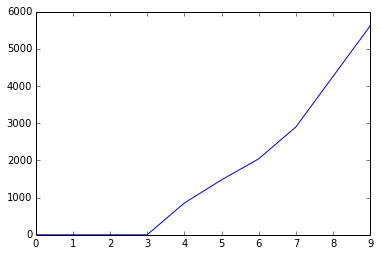

In [26]:
plt.plot(-impot)